# Построение спектров Rrs осредненных по области

In [466]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import path

## input data

In [467]:
# change these fields
current_date = '31.05.2022'
satellite_label = 'S3B'
BASE_DIR = '/media/data1/laboratory/results/aerosol-2022/'  # mhi
#BASE_DIR = '/media/data/gorky/aerosol-2022/'  # home

# datafile with rrs calculated by 2nd-percentile AOT in area
second_perc_file = 'Rrs_area_ac-8_4'
# datafile with rrs calculated by measured AOT in area
measured_aot_file = 'Rrs_area_ac-8_2'

In [468]:
# static input fields
data_dir = path.join(BASE_DIR, 'l2gen/results/Rrs')

# formatted date
date_formated = {'31.05.2022': '31 May 2022', '24.06.2022': '24 June 2022',
            '27.07.2022': '27 July 2022', '01.08.2022': '01 August 2022',
            '02.08.2022': '02 August 2022', '08.08.2022': '08 August 2022'}

In [469]:
# dynamic input fields
day, month, year = current_date.split('.')

# datafile with rrs calculated by 5th-percentile AOT
#fname_rrs_ac8 = f'{satellite_label}_{year}-{month}-{day}_Rrs_area_ac-8.txt'

# datafile with rrs calculated by 2nd-percentile AOT
#fname_rrs_ac8 = f'{satellite_label}_{year}-{month}-{day}_Rrs_area_ac-8_3.txt'

# datafile with rrs calculated by 2nd-percentile AOT in area
fname_rrs_2nd_perc = f'{satellite_label}_{year}-{month}-{day}_{second_perc_file}.txt'

# datafile with rrs calculated by measured AOT
fname_rrs_meas_aot = f'{satellite_label}_{year}-{month}-{day}_{measured_aot_file}.txt'

fname_rrs_2nd_perc = path.join(data_dir, fname_rrs_2nd_perc)
fname_rrs_meas_aot = path.join(data_dir, fname_rrs_meas_aot)

## Open files, calculate min, mean, max spectra Rrs in area

In [470]:
# use columns for Rrs
usecolumns = range(4,16)
# names of columns
column_names = [400, 412, 443, 490, 510, 560, 620, 665, 674, 682, 709, 754]

In [471]:
# TODO можно сделать в цикле считывание rrs_table[0,1], а потом rrs_statistics
rrs_2nd_perc = pd.read_csv(fname_rrs_2nd_perc, sep='\t', usecols=usecolumns, header=0, names=column_names)
rrs_2nd_perc = rrs_2nd_perc.dropna(how='all')

In [472]:
rrs_2nd_perc.head()

,400,412,443,490,510,560,620,665,674,682,709,754
0,-0.001596,-0.000878,0.000790,0.001638,0.002012,0.003020,0.003150,0.002914,0.002988,0.003014,0.002700,0.002436
1,-0.001596,-0.000878,0.000790,0.001638,0.002012,0.003020,0.003150,0.002914,0.002988,0.003014,0.002700,0.002436
2,-0.001760,-0.000862,0.000846,0.001510,0.001958,0.003102,0.002976,0.002818,0.002860,0.002806,0.002688,0.002584
3,-0.001760,-0.000862,0.000846,0.001510,0.001958,0.003102,0.002976,0.002818,0.002860,0.002806,0.002688,0.002584
4,-0.001352,-0.000516,0.000804,0.001952,0.002126,0.003370,0.003234,0.003038,0.002974,0.002908,0.002984,0.003514


In [473]:
statistics = {'min': rrs_2nd_perc.min(),
             'median': rrs_2nd_perc.median(),
             'max': rrs_2nd_perc.max(),
             'mean': rrs_2nd_perc.mean(),}

In [474]:
rrs_2nd_perc_statistic = pd.DataFrame(statistics)

In [475]:
rrs_2nd_perc_statistic.T

,400,412,443,490,510,560,620,665,674,682,709,754
min,-0.001760,-0.000878,0.000628,0.001510,0.001938,0.002960,0.002976,0.002818,0.002860,0.002806,0.002682,0.002436
median,-0.000546,0.000356,0.001632,0.002492,0.002741,0.003850,0.003813,0.003658,0.003644,0.003650,0.003495,0.003804
max,0.000626,0.001272,0.002602,0.003416,0.003606,0.004882,0.004832,0.004670,0.004646,0.004630,0.004918,0.006440
mean,-0.000576,0.000247,0.001587,0.002465,0.002686,0.003825,0.003780,0.003640,0.003605,0.003629,0.003504,0.003883


In [476]:
rrs_meas_aot = pd.read_csv(fname_rrs_meas_aot, sep='\t', usecols=usecolumns, header=0, names=column_names)
rrs_meas_aot = rrs_meas_aot.dropna(how='all')

In [477]:
statistics = {'min': rrs_meas_aot.min(),
             'median': rrs_meas_aot.median(),
             'max': rrs_meas_aot.max(),
             'mean': rrs_meas_aot.mean(),}

In [478]:
rrs_meas_aot_statistic = pd.DataFrame(statistics)

In [479]:
import matplotlib.pyplot as plt

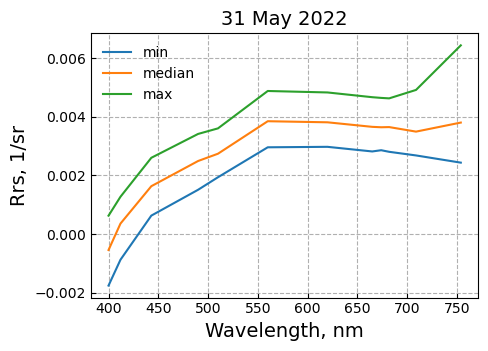

In [480]:
plt.figure(dpi=100, figsize=(5,3.5))
ax = plt.axes()
plt.plot(rrs_2nd_perc_statistic['min'], label='min')
plt.plot(rrs_2nd_perc_statistic['median'], label='median')
plt.plot(rrs_2nd_perc_statistic['max'], label='max')
ax.tick_params(axis='both', direction='in')
plt.ylabel("Rrs, 1/sr", fontsize=14)
plt.xlabel("Wavelength, nm", fontsize=14)
ax.grid(True, linestyle='--')
plt.title(date_formated[current_date], fontsize=14)
plt.legend(frameon=False)

img_name = path.join(data_dir, f'Rrs_{satellite_label}_{year}-{month}-{day}_area2.png')
plt.savefig(img_name, dpi=300, bbox_inches='tight')
plt.show()

In [481]:
relative_difference = abs(rrs_2nd_perc_statistic - rrs_meas_aot_statistic)/rrs_meas_aot_statistic*100

In [482]:
relative_difference

,min,median,max,mean
400,-187.581961,190.848303,64.592729,200.727211
412,510.278285,75.414319,46.192878,81.575454
443,60.303379,36.695097,26.497166,37.339210
490,31.920633,21.929819,16.885643,22.124414
510,24.591434,18.568032,14.590238,18.880451
560,12.889931,10.088742,7.921538,10.081793
620,8.711654,6.635652,5.180533,6.747336
665,5.815506,4.240839,3.192379,4.286525
674,5.235257,3.750659,2.884615,3.916170
682,4.752202,3.413601,2.608329,3.510671


In [483]:
ofile = f'Rrs-difference_{satellite_label}_{year}-{month}-{day}_area2.csv'
ofile = path.join(data_dir, ofile)
relative_difference.to_csv(ofile, sep='\t')